# **Modelo v1 - Classificação de emoção das respostas do Simplício**


## **Link do Projeto no Colab**

---

https://colab.research.google.com/drive/1UaG9O7OMW8K5VIyHMtkQbQOi3zW28z2q?usp=sharing

## **Introdução**
---

A classificação de sentimentos é uma tarefa importante em análise de texto, que envolve determinar a opinião ou emoção expressa em um determinado texto. Com o avanço das técnicas de processamento de linguagem natural (NLP) e aprendizado de máquina, tornou-se possível automatizar essa tarefa e extrair informações valiosas de grandes volumes de texto.

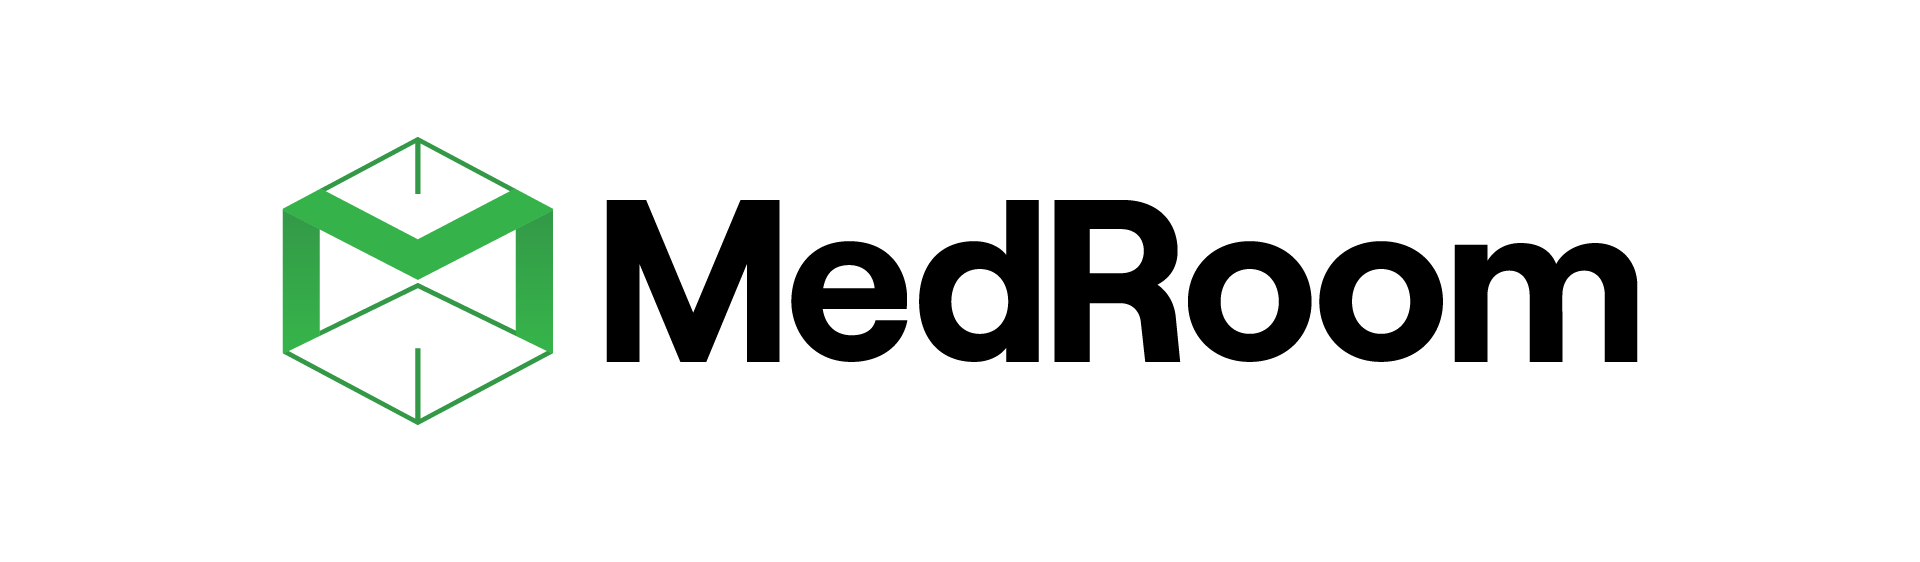

Neste projeto, utilizaremos um conjunto de dados pré-processados, que consiste em perguntas de pessoas reais e respostas do Simplício (Paciente Virtual) rotuladas com os seguintes sentimentos: neutro, medo, raiva, alegria, desgosto, surpresa, tristeza. Usaremos técnicas de pré-processamento de texto e treinaremos um modelo de classificação de sentimentos usando um algoritmo chamado Naive Bayes.

## **Sobre os dados**
---

Este estudo é uma continuação da [análise exploratória de rotulagem do Simplício](https://colab.research.google.com/drive/1s-9r9y3ysYLXDVZ_D8DK-Q-CjiUJ-qQt#scrollTo=8NG6PaWa8xg1), estaremos utilizando dados obtidos de diálogos entre pessoas reais e nosso modelo de inteligência artificial, o Simplício.

Através da análise exploratória, acabamos mexendo bastante em nosso conjunto de dados, por isso vou listar as colunas importantes aqui:

- **Perguntas_tratadas:** Pergunta feita pelas pessoas
- **Emocao_Final_Perguntas:** Rótulo anotado para o sentimento da pergunta feita pelas pessoas
- **Respostas_tratadas:** Resposta do Simplício
- **Emocao_Final_Resposta:** Rótulo anotado para o sentimento da resposta do Simplício

Um ponto importante é que desta vez vamos remover dados duplicados, pois este estudo trata-se de criação de um modelo de machine learning, a presença de dados duplicados pode levar a resultados enviesados e superestimar a importância dessas instâncias durante o treinamento do modelo.

## **Objetivo**
---

Com base nas informações dispostas nesse conjunto de dados, temos como objetivo:
- Criar um modelo de classificação de emoção/sentimentos das respostas do Simplício

<img src="https://media.giphy.com/media/dQpUkK59l5Imxsh8jN/giphy.gif" alt="win" width="600"/>

## **Importando bibliotecas**
---

Vamos começar importando as bibliotecas necessárias para o código:

In [ ]:
# Importando libs
import warnings
warnings.filterwarnings('ignore')
import pandas as pd # Manipulação de dados
from sklearn.model_selection import train_test_split # Dividir o conjunto de dados
from sklearn.feature_extraction.text import CountVectorizer # Vetorização de texto
from sklearn.naive_bayes import MultinomialNB # Modelo Naive Bayes
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score # Métricas de avaliação
from imblearn.under_sampling import RandomUnderSampler # Balanceamento de classes
from imblearn.over_sampling import RandomOverSampler # Balanceamento de classes
import numpy as np # Manipulação de arrays
from sklearn.model_selection import GridSearchCV # Busca de hiperparâmetros
import seaborn as sns # Gráficos
import matplotlib.pyplot as plt # Gráficos
import string # Manipulação de strings
!pip install unidecode
from unidecode import unidecode # Remover acentos

## **Primeiras impressões do nosso conjunto de dados**
---

Feito a importação da bibliotecas necessárias, vamos importar nossos dados e visualizar as primeiras linhas:

In [ ]:
# Importando dados
dados = pd.read_excel('Resultado_analise_exploratoria.xlsx')

In [ ]:
# Visualização das 3 primeiras linhas do dataset
dados.head(3)

,Pergunta,Resposta,Comentarios_hugo,Comentarios_luisa,Emocao_Final_Perguntas,Emocao_Final_Resposta,Perguntas_tratadas,Respostas_tratadas,Comprimento_Resposta,Comprimento_Pergunta,sentimento_pergunta_numerico,sentimento_resposta_numerico,Entidades_Respostas,Entidades_Perguntas
0,O que você gosta de comer?,"Eu gosto de comer carne, arroz, feijão, batata...",NaN,NaN,Neutro,Neutro,o que voce gosta de comer,eu gosto de comer carne arroz feijao batata e ...,89,25,0.0,0,[],[]
1,Desde quando começou esse sintoma?,"Há uns oito anos, foi quando eu fui diagnostic...",NaN,NaN,Neutro,Neutro,desde quando comecou esse sintoma,ha uns oito anos foi quando eu fui diagnosticado,48,33,0.0,0,[],[]
2,O que você está sentindo?,"Estou sentindo muita dor nas pernas, eu não se...",NaN,"Acho que existe certo medo leve, como uma preo...",Neutro,Medo,o que voce esta sentindo,estou sentindo muita dor nas pernas eu nao sei...,87,24,0.0,-1,[],[]


In [ ]:
# Verificando as informações do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1702 entries, 0 to 1701
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Pergunta                      1702 non-null   object 
 1   Resposta                      1702 non-null   object 
 2   Comentarios_hugo              172 non-null    object 
 3   Comentarios_luisa             221 non-null    object 
 4   Emocao_Final_Perguntas        1702 non-null   object 
 5   Emocao_Final_Resposta         1702 non-null   object 
 6   Perguntas_tratadas            1702 non-null   object 
 7   Respostas_tratadas            1702 non-null   object 
 8   Comprimento_Resposta          1702 non-null   int64  
 9   Comprimento_Pergunta          1702 non-null   int64  
 10  sentimento_pergunta_numerico  1697 non-null   float64
 11  sentimento_resposta_numerico  1702 non-null   int64  
 12  Entidades_Respostas           1702 non-null   object 
 13  Ent

Conforme já mencionado, esse conjunto de dados veio de um outro estudo em que fizemos uma análise exploratória (Para acessar [clique aqui](https://colab.research.google.com/drive/1s-9r9y3ysYLXDVZ_D8DK-Q-CjiUJ-qQt?usp=sharing)). Para gerarmos um modelo de classificação de sentimentos, vamos selecionar somente as colunas relevantes:

In [ ]:
# Seleciona as colunas relevantes
df_perguntas = dados[['Perguntas_tratadas', 'Emocao_Final_Perguntas']]
df_respostas = dados[['Respostas_tratadas', 'Emocao_Final_Resposta']]

# Renomeia as colunas para "Texto" e "Emocao"
df_perguntas.columns = ['Texto', 'Emocao']
df_respostas.columns = ['Texto', 'Emocao']

# Concatena os dois DataFrames
df = pd.concat([df_perguntas, df_respostas], ignore_index=True)

Agora que temos um novo DataFrame, vamos remover as linhas duplicadas e tirar as primeiras impressões:

In [ ]:
# Remove linhas duplicadas
df = df.drop_duplicates()

In [ ]:
# Visualização das 5 primeiras linhas do dataset
df.head(5)

,Texto,Emocao
0,o que voce gosta de comer,Neutro
1,desde quando comecou esse sintoma,Neutro
2,o que voce esta sentindo,Neutro
3,tudo bem qual o seu nome,Neutro
4,o que voce faz da vida,Neutro


In [ ]:
# Verificando as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2533 entries, 0 to 3402
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Texto   2533 non-null   object
 1   Emocao  2533 non-null   object
dtypes: object(2)
memory usage: 59.4+ KB


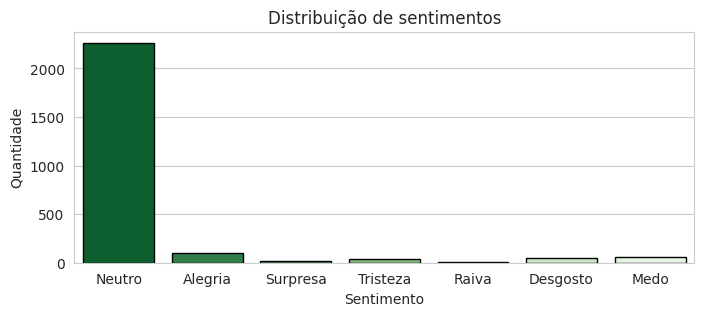

In [ ]:
# Distribuição de sentimentos
sns.set_style('whitegrid')
plt.figure(figsize=(8, 3))
sns.countplot(x='Emocao', data=df, palette='Greens_r',edgecolor='black');
plt.title("Distribuição de sentimentos");
plt.xlabel("Sentimento");
plt.ylabel("Quantidade");

In [ ]:
df.Emocao.value_counts()

Neutro      2265
Alegria      104
Medo          62
Desgosto      46
Tristeza      38
Surpresa      13
Raiva          5
Name: Emocao, dtype: int64

Até aqui podemos concluir que:

- Nosso conjunto de dados possui 2.533 registros (Texto/Sentimento)
- Não temos dados nulos
- Nossos dados estão desbalanceados
- A distribuição dos sentimentos está da seguinte forma:
  - **89,41%** = 'Neutro'
  - **4,10%** = 'Alegria'
  - **2,44%** = 'Medo'
  - **1,81%** = 'Desgosto'
  - **1,50%** = 'Tristeza'
  - **<1%** = 'Surpresa'
  - **<1%** = 'Raiva'

## **Modelo Naive Bayes v1.0**
---

O algoritmo Naive Bayes é uma técnica popular para classificação de textos, incluindo a tarefa de classificação de sentimentos. Embora seja considerado um algoritmo relativamente simples, Naive Bayes pode fornecer resultados satisfatórios em muitos casos e tem sido amplamente utilizado para classificação de sentimentos em diversas aplicações.

Seus resultados podem variar dependendo da natureza do problema, do conjunto de dados e da complexidade das relações entre as features.

Nesse modelo v1.0 vamos utilizar o Naive Bayes sem adição de hiperparâmetros e com o método de balanceamento de classes 'Undersampling'.

### **Divisão treino e teste**
---

Tirado as primeiras impressões do nosso conjunto de dados, precisamos dividir nossos dados em dois conjuntos:

Dados que serão apresentados ao algoritmo para treinar um modelo (Treino) Dados que serão apresentados ao modelo após a sua criação para simular previsões reais (Teste):

In [ ]:
def div_treino_teste(DataFrame):
  # Extraindo valores das colunas
  x = DataFrame['Texto'].values # Dados de entrada
  y = DataFrame['Emocao'].values # Alvo

  # Dividindo nosso conjunto de dados em treino e teste. O parâmetro 'test_size' define a proporção do conjunto de teste (30% neste caso)
  x_train, x_test, y_train, y_test = train_test_split(x,
                                                      y,
                                                      stratify=y,
                                                      shuffle=True,
                                                      test_size = 0.30,
                                                      random_state=1)
  # Retorno da função
  return x, y, x_train, x_test, y_train, y_test

In [ ]:
# Criando variáveis e passando nosso DataFrame para divisão treino e teste
x, y, x_train, x_test, y_train, y_test = div_treino_teste(df)

### **Undersampling | Balanceamento de classes**
---

Datasets com mais de 50% das entradas pertencendo a uma única classe são considerados desbalanceados. Em casos de dados desbalanceados, os limites de decisão estabelecidos pelos algoritmos tendem a favorecer a classe majoritária, levando a uma classificação incorreta da classe minoritária.

As técnicas de amostragem, como Undersampling e Oversampling, são métodos comuns para lidar com o desequilíbrio de classes. De modo geral, o under-sampling consiste em remover exemplos da classe majoritária para tornar a proporção entre as classes mais equilibrada.

In [ ]:
# Obtendo a contagem de valores da variável alvo depois da divisão treino e teste
unique_values, value_counts = np.unique(y_train, return_counts=True)
unique_values, value_counts

(array(['Alegria', 'Desgosto', 'Medo', 'Neutro', 'Raiva', 'Surpresa',
        'Tristeza'], dtype=object),
 array([  73,   32,   43, 1585,    4,    9,   27]))

Vamos começar criando um objeto RandomUnderSampler para realizar o undersampling e balancear as classes no conjunto de treinamento:

In [ ]:
# Criando uma instância do RandomUnderSampling
sampling_strategy = {'Neutro': 80, 'Raiva': 4, 'Alegria': 73, 'Medo': 43, 'Desgosto': 32, 'Tristeza': 27, 'Surpresa': 9}
rus = RandomUnderSampler(random_state=1, sampling_strategy=sampling_strategy)

Agora vamos aplicar o método 'fit_resample' ao conjunto de treinamento que retorna as amostras undersampled:

In [ ]:
# Método fit_resample
X_resampled, y_resampled = rus.fit_resample(x_train.reshape(-1,1), y_train)

Agora que realizamos o balanceamento de classes, podemos visualizar o tamanho da nossa amostra no conjunto de treinamento:

In [ ]:
# Verificando samples
print("Temos", len(y_resampled), "amostras para o treinamento do modelo")

Temos 268 amostras para o treinamento do modelo


Devido ao desbalancemento de classe (+ de 88% dos dados Neutros), saímos de 1.773 amostras que poderiam ir para treinamento e chegamos à 268.

### **Vetorização de texto**
---

A vetorização de texto é um processo fundamental em tarefas de processamento de linguagem natural (NLP) e análise de texto. Ela consiste em converter textos em representações numéricas (vetores) que possam ser processadas por algoritmos de aprendizado de máquina.

A técnica CountVectorizer é uma das abordagens comuns de vetorização de texto usadas na área de processamento de linguagem natural (NLP). Ela faz parte da família de modelos de saco de palavras (Bag-of-Words) e é amplamente utilizada para representar documentos de texto como vetores numéricos.

A ideia por trás do CountVectorizer é contar a frequência de ocorrência de cada palavra em um documento e criar um vetor com essas contagens. Cada palavra única no vocabulário é representada por uma dimensão no vetor, e o valor nessa dimensão é a contagem de quantas vezes a palavra aparece no documento.

Vamos começar criando um objeto 'CountVectorizer' para vetorizar os textos de treinamento:

In [ ]:
# Criando uma instância do CountVectorizer
vectorizer = CountVectorizer()

Em seguida vamos aplicar o método 'fit_transform' aos textos de treinamento undersampled e retornar a matriz de características vetorizadas.

In [ ]:
# Método fit_transform
X_train_vectorized = vectorizer.fit_transform(X_resampled.flatten())

Vamos começar criando um objeto 'MultinomialNB' e treinar o modelo Naive Bayes utilizando a matriz de características vetorizadas e as emoções correspondentes:

In [ ]:
# Criando uma instância do MultinomialNB
model = MultinomialNB()

# Treinando o modelo
model.fit(X_train_vectorized, y_resampled)

MultinomialNB()

Agora iremos vetorizar os textos de teste usando o mesmo vetorizador usado para os textos de treinamento e fazer previsões de emoções utilizando o modelo treinado:

In [ ]:
# Vetorizar os textos de teste
X_test_vectorized = vectorizer.transform(x_test)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_vectorized)

### **Avaliação**
---

Agora que temos nosso modelo treinado vamos aplicar métricas de avaliação para sabermos como foi o desempenho do modelo:

#### **Acurácia**
---

Umas das métricas de avaliação é a "Acurácia", ela diz o quanto o modelo acertou de acordo com as previsões possíveis:

In [ ]:
# Acurácia
acc = accuracy_score(y_test,y_pred)
print("Acurácia do modelo = %2.f%%" % (acc *100.00))

Acurácia do modelo = 60%


#### **Relatório de classificação**
---

Dentre as bibliotecas que importamos existe o "relatório de classificação", nele somos apresentados a mais 3 métricas, são elas:

- *Recall/Sensibilidade*: Medida que nos mostra o quão bom o modelo é para prever/detectar positivos
- *Precisão*: Medida que nos ajuda a responder a seguinte pergunta: Dos classificados como positivos, quantos são realmente positivos?
- *f1-score:* Nos mostra o balanço entre a precisão e o recall de nosso modelo, quanto mais próximo de 1 melhor

In [ ]:
# Criando relatório de classificação
report_df = pd.DataFrame(classification_report(y_test,y_pred, output_dict=True)). T
report_df = report_df.drop(columns=['support'])

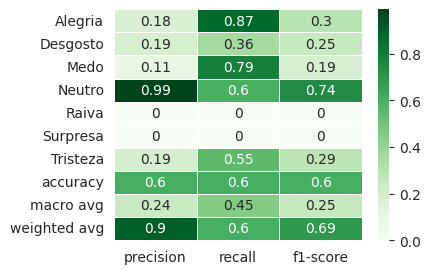

In [ ]:
# Plotagem do relatório de classificação
plt.subplots(figsize=(4,3))
sns.heatmap(report_df, cmap='Greens', linewidths=0.5, annot=True);

#### **Matriz de confusão**
---

A "matriz de confusão" é uma tabela que mostra as frequências de classificação para cada classe do nosso modelo:

In [ ]:
# Criando a matriz de confusão
cnf_report_df = report_df.index[:-3]
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix = pd.DataFrame(cnf_matrix, index = cnf_report_df.values, columns = cnf_report_df.values)
cnf_matrix = cnf_matrix/cnf_matrix.sum(axis=1)[:, np.newaxis] # Normalização em linha (recall)

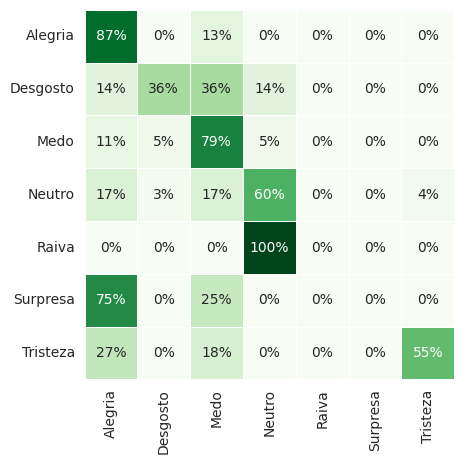

In [ ]:
# Plotagem da matriz de confusão
sns.heatmap(cnf_matrix, cmap='Greens', linecolor='white', linewidths=0.5,
            annot=True, fmt='.0%', cbar=False, square=True);

#### **Testes**

Bora realizar alguns testes, vetorizando um texto aleatório e fazendo a previsão de sentimento utilizando o modelo treinado:

In [ ]:
# Lista de frases que vamos testar
list_texto = ['Dona albertina faleceu', 'Qual time você torce?', 'Eu torço pro Santos',
              'Eu gosto de ir no baile da terceira idade', 'Não gosto do palmeiras',
              'Tenho medo de agulha', 'sentindo dor nas pernas', 'Bom dia Simplício',
              'É bom ter você aqui']

In [ ]:
# Previsões da lista de frases
for x in list_texto:
  texto_teste = x
  texto_teste_vectorized = vectorizer.transform([texto_teste])
  sentimento = model.predict(texto_teste_vectorized)[0]
  print("Texto de teste:", texto_teste)
  print("Sentimento:", sentimento)
  print('')

Texto de teste: Dona albertina faleceu
Sentimento: Tristeza

Texto de teste: Qual time você torce?
Sentimento: Neutro

Texto de teste: Eu torço pro Santos
Sentimento: Alegria

Texto de teste: Eu gosto de ir no baile da terceira idade
Sentimento: Alegria

Texto de teste: Não gosto do palmeiras
Sentimento: Alegria

Texto de teste: Tenho medo de agulha
Sentimento: Medo

Texto de teste: sentindo dor nas pernas
Sentimento: Desgosto

Texto de teste: Bom dia Simplício
Sentimento: Alegria

Texto de teste: É bom ter você aqui
Sentimento: Alegria



#### **Considerações**
---

Conclusões após avaliação:
- Nossa acurácia ficou em 60%
- Nosso relatório de classificação mostra que o f1-score (média ponderada) ficou em 69%
- Matriz de confunsão mostra que nosso modelo possui extrema facilidade de encontrar sentimentos de 'Alegria', 'Medo' e 'Neutro' e muita dificuldade em classificar 'Raiva', 'Surpresa' e 'Desgosto'.

Para um modelo v1.0 acredito que tivemos resultados "Ok", claro que ainda estamos longe do resultado ideal, mas é importante lembrar que estamos trabalhando com dados desbalanceados. Tentamos contornar com o método Undersampling, mas temos classes com muito pouco dado.

## **Modelo Naive Bayes v1.1**
---


Agora que treinamos o primeiro modelo, vamos tentar melhorar esse modelo mexendo nos hiperparâmetros.



### **Hiperparâmetros**
-----

O algoritmo Naive Bayes é relativamente fraco em relação à isso, os hiperparâmetros mais importantes são:

**fit_prior:** Este parâmetro controla se as probabilidades a priori das classes devem ser ajustadas com base nos dados ou se devem ser usadas as probabilidades a priori uniformes. O valor padrão é True, o que significa que as probabilidades a priori serão ajustadas. Estando como False usamos probabilidades a priori uniformes.

**alpha:**
Este parâmetro controla a suavização Laplaciana aplicada às probabilidades estimadas pelo modelo. Um valor maior de alpha resulta em uma suavização mais forte. O valor padrão é 1.0. Experimentar valores diferentes para alpha pode ajudar a ajustar o trade-off entre viés e variância do modelo.


### **GridSearchCV**
---

Para nos ajudar achar o melhor 'alpha' vamos utilizar um método chamado GridSearchCV:

In [ ]:
# Define o grid de parâmetros
param_grid = {
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0],  # Valores a serem testados para o parâmetro 'alpha'
    'fit_prior': [True, False]
    }

In [ ]:
# Cria uma instância do modelo MultinomialNB
model2 = MultinomialNB()

# Cria uma instância do GridSearchCV
grid_search = GridSearchCV(model2, param_grid, cv=5, scoring='accuracy')

# Realiza a otimização dos hiperparâmetros
grid_search.fit(X_train_vectorized, y_resampled)

# Obtém os melhores hiperparâmetros
melhores_parametros = grid_search.best_params_
print("Melhores Hiperparâmetros:", melhores_parametros)

Melhores Hiperparâmetros: {'alpha': 0.9, 'fit_prior': True}


In [ ]:
# Treina o modelo com os melhores hiperparâmetros
model2 = MultinomialNB(alpha=melhores_parametros['alpha'],fit_prior=melhores_parametros['fit_prior'])
model2.fit(X_train_vectorized, y_resampled)

MultinomialNB(alpha=0.9)

In [ ]:
# Faz previsões no conjunto de teste usando o melhor modelo
y_pred = model2.predict(X_test_vectorized)

### **Avaliação**
---

Agora que temos nosso modelo treinado com os hiperparâmetros vamos avaliar os resultados:

#### **Acurácia**
---

In [ ]:
# Acurácia
acc = accuracy_score(y_test,y_pred)
print("Acurácia do modelo = %2.f%%" % (acc *100.00))

Acurácia do modelo = 61%


#### **Relatório de classificação**
---

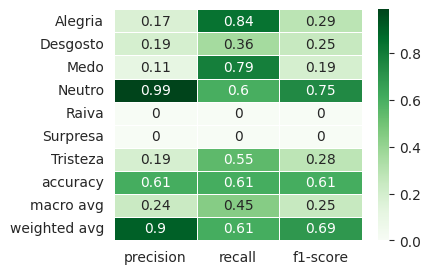

In [ ]:
# Criando relatório de classificação
report_df = pd.DataFrame(classification_report(y_test,y_pred, output_dict=True)). T
report_df = report_df.drop(columns=['support'])

# Plotagem do relatório de classificação
plt.subplots(figsize=(4,3))
sns.heatmap(report_df, cmap='Greens', linewidths=0.5, annot=True);

#### **Matriz de confusão**
---

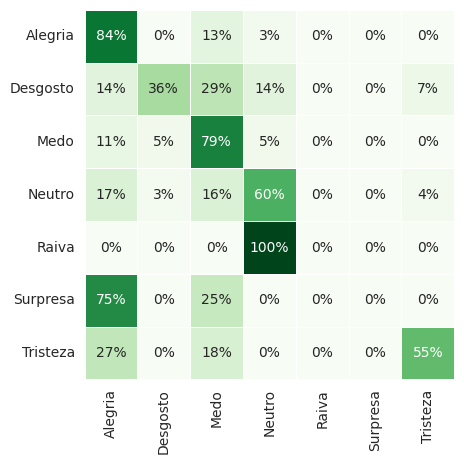

In [ ]:
# Criando a matriz de confusão
cnf_report_df = report_df.index[:-3]
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix = pd.DataFrame(cnf_matrix, index = cnf_report_df.values, columns = cnf_report_df.values)
cnf_matrix = cnf_matrix/cnf_matrix.sum(axis=1)[:, np.newaxis] # Normalização em linha (recall)

# Plotagem da matriz de confusão
sns.heatmap(cnf_matrix, cmap='Greens', linecolor='white', linewidths=0.5,
            annot=True, fmt='.0%', cbar=False, square=True);

#### **Considerações**
---

Mudanças no resultados:
* Nossa acurácia aumentou em 1%
* Apesar do aumento da acurácia, outras métricas como f1-score se manteve
* Perdemos 3% de acerto na emoção "Alegria"




## **Modelo Naive Bayes v1.2**
---

Agora que já testamos o método undersampling com otimização de hiperparâmetros, vamos adicionar o método Oversampling.

### **Oversampling | Balanceamento de classes**
---

Oversampling consiste em gerar novos exemplos para a classe minoritária, de forma a aumentar sua representatividade no conjunto de dados. Vamos aumentar as classes 'Raiva', 'Medo', 'Surpresa', 'Desgosto' e 'Tristeza':


In [ ]:
# Definir a estratégia de oversampling desejada
oversampling_strategy = {'Raiva': 60, 'Medo': 60, 'Surpresa':60, 'Desgosto': 60, 'Tristeza': 60}

# Criar uma instância do RandomOverSampler
ros = RandomOverSampler(random_state=1, sampling_strategy=oversampling_strategy)

# Aplicar o oversampling ao conjunto de dados reduzido
X_resampled_oversampled, y_resampled_oversampled = ros.fit_resample(X_resampled, y_resampled)

In [ ]:
# Verificando samples
print("Temos", len(y_resampled_oversampled), "amostras para o treinamento do modelo")

Temos 453 amostras para o treinamento do modelo


**Funcionamento do Oversampling:** ele está pegando frases do próprio dataset atribuidas como 'Raiva', 'Medo', 'Surpresa', 'Desgosto' e 'Tristeza' e replicando-as

In [ ]:
# Ver amostras
# X_resampled_oversampled

### **GridSearchCV**
---

In [ ]:
#Vetorização
X_train_vectorized_oversampled = vectorizer.fit_transform(X_resampled_oversampled.flatten())

# Cria uma instância do modelo MultinomialNB
model3 = MultinomialNB()

# Cria uma instância do GridSearchCV
grid_search = GridSearchCV(model3, param_grid, cv=5, scoring='accuracy')

# Realiza a otimização dos hiperparâmetros
grid_search.fit(X_train_vectorized_oversampled, y_resampled_oversampled)

# Obtém os melhores hiperparâmetros
melhores_parametros = grid_search.best_params_
print("Melhores Hiperparâmetros:", melhores_parametros)

Melhores Hiperparâmetros: {'alpha': 0.1, 'fit_prior': True}


In [ ]:
# Treina o modelo com os melhores hiperparâmetros
model3 = MultinomialNB(alpha=melhores_parametros['alpha'],fit_prior=melhores_parametros['fit_prior'])
model3.fit(X_train_vectorized_oversampled, y_resampled_oversampled)

MultinomialNB(alpha=0.1)

In [ ]:
# Fazer previsões no conjunto de teste
y_pred = model3.predict(X_test_vectorized)

### **Avaliação**
---

Vamos avaliar nosso modelo V1.2

#### **Acurácia**
---

In [ ]:
# Acurácia
acc = accuracy_score(y_test,y_pred)
print("Acurácia do modelo = %2.f%%" % (acc *100.00))

Acurácia do modelo = 58%


#### **Relatório de classificação**
---

In [ ]:
# Criando relatório de classificação
report_df = pd.DataFrame(classification_report(y_test,y_pred, output_dict=True)). T
report_df = report_df.drop(columns=['support'])

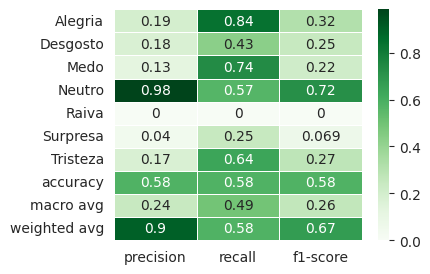

In [ ]:
# Plotagem do relatório de classificação
plt.subplots(figsize=(4,3))
sns.heatmap(report_df, cmap='Greens', linewidths=0.5, annot=True);

#### **Matriz de confusão**
---

In [ ]:
# Criando a matriz de confusão
cnf_report_df = report_df.index[:-3]
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix = pd.DataFrame(cnf_matrix, index = cnf_report_df.values, columns = cnf_report_df.values)
cnf_matrix = cnf_matrix/cnf_matrix.sum(axis=1)[:, np.newaxis] # Normalização em linha (recall)

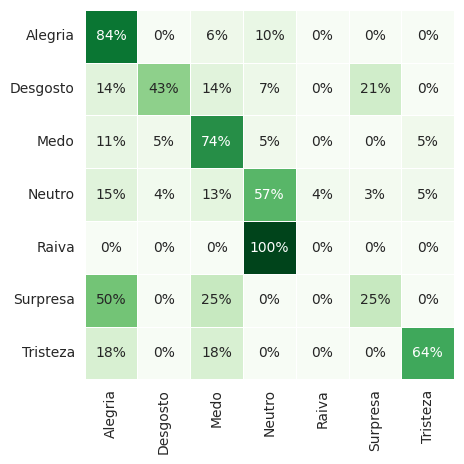

In [ ]:
# Plotagem da matriz de confusão
sns.heatmap(cnf_matrix, cmap='Greens', linecolor='white', linewidths=0.5,
            annot=True, fmt='.0%', cbar=False, square=True);

#### **Considerações**
---

Aqui tivemos alguns resultados curiosos e que vão de encontro ao nosso alerta no começo do estudo sobre dados duplicados, vamos aos pontos:

- O modelo v1.2 foi o que apresentou a menor acurácia (58%)
- Perdeu 2% de f1-score em relação ao v1.0 e v1.1 (67%)

Como duplicamos a quantidade de dados conseguimos ver menos confusão entre as classificações dos seguintes sentimentos:
- 'Desgosto' aumentou 7%
- 'Surpresa' aumentou 25%
- 'Tristeza' aumentou 9%

Em contrapartida:
- 'Medo' caiu 5%
- 'Neutro' caiu 3%

Aqui pode ter acontecido algo que chamamos de overfiting!

O overfitting, ou sobreajuste, é um fenômeno que ocorre quando um modelo de aprendizado de máquina se ajusta muito bem aos dados de treinamento, mas tem um desempenho inferior ao encontrar novos dados ou realizar previsões em um conjunto de teste. Em outras palavras, o modelo "decora" os dados de treinamento em vez de generalizar padrões e relações, resultando em um desempenho pobre em dados não vistos anteriormente.

## **Modelo Naive Bayes v1.3**
---

Agora vamos criar a versão v1.3 e última com o modelo Naive Bayes. A partir daqui é importante dizer que teremos alteração em nosso conjunto de dados.

Iremos mesclar os dados de perguntas das pessoas reais e resposta do nosso paciente virtual Simplício + frases geradas na plataforma https://chat.openai.com/ (ChatGPT) para balancear as classes.

### **Sobre os dados**
---

Aqui vamos trabalhar com três colunas:
- **Texto:** Pergunta das pessoas reais, respostas do Simplício e frases geradas pelo gpt
- **Emocao:** Rótulo anotado para o sentimento do texto
- **Contexto:** Rótulo de onde saiu o texto:
  - Simplício
  - GPT
  - Pergunta das pessoas
  - Google

### **Importando dados**

In [ ]:
# Importando os dados
df_balanceado = pd.read_csv("Dados_Balanceados_oficial.csv")
df_validacao = pd.read_csv("Dados_Balanceados_validacao.csv")

### **Tratamento e limpeza**

In [ ]:
# Importanto libs
import string
!pip install unidecode
from unidecode import unidecode

In [ ]:
# Criando função que vai tratar nosso texto
def tratar_texto(texto):
    # Remover acentos
    texto_sem_acentos = unidecode(texto)

    # Remover pontuações
    texto_sem_pontuacoes = texto_sem_acentos.translate(str.maketrans("", "", string.punctuation))

    # Converter para letras minúsculas
    texto_tratado = texto_sem_pontuacoes.lower()

    return texto_tratado

In [ ]:
# Aplicando limpeza no conjunto de dados
df_balanceado.Texto = df_balanceado.Texto.apply(tratar_texto)

In [ ]:
# Remove linhas duplicadas
df_balanceado = df_balanceado.drop_duplicates()

###**Primeiras impressões do nosso conjunto de dados**
---

In [ ]:
# Visualização das 5 primeiras linhas do dataset
df_balanceado.head(5)

,Texto,Emocao,Contexto
0,a alegria e como um abraco que aquece o coraca...,Alegria,GPT
1,a alegria e como um perfume que envolve e enca...,Alegria,GPT
2,a alegria e como um raio de sol que ilumina at...,Alegria,GPT
3,a alegria e como uma chama que acende nosso co...,Alegria,GPT
4,a alegria e como uma chama que aquece o coraca...,Alegria,GPT


In [ ]:
# Verificando as informações do dataset
df_balanceado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 932
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Texto     917 non-null    object
 1   Emocao    917 non-null    object
 2   Contexto  917 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


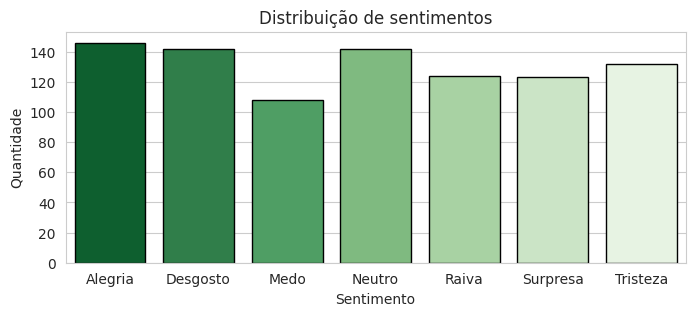

In [ ]:
# Distribuição de sentimentos
sns.set_style('whitegrid')
plt.figure(figsize=(8, 3))
sns.countplot(x='Emocao', data=df_balanceado, palette='Greens_r',edgecolor='black');
plt.title("Distribuição de sentimentos");
plt.xlabel("Sentimento");
plt.ylabel("Quantidade");

In [ ]:
# Distribuição de sentimentos
df_balanceado.Emocao.value_counts()

Alegria     146
Desgosto    142
Neutro      142
Tristeza    132
Raiva       124
Surpresa    123
Medo        108
Name: Emocao, dtype: int64

Tirado as primeiras impressões do conjunto de dados e realizado limpeza e tratamento, podemos notar que estamos trabalhando com 917 registros e que nossos dados agora estão mais balanceados.

### **Divisão treino e teste**
---

In [ ]:
# Divisão treino e teste
x, y, x_train, x_test, y_train, y_test = div_treino_teste(df_balanceado)

### **GridSearchCV**
---

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
# Definir o pipeline com CountVectorizer e Naive Bayes
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', MultinomialNB())
])

# Definir os parâmetros para busca no GridSearch
parameters = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)],  # n-gram
    'classifier__alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0], # 'alpha'
    'classifier__fit_prior': [True, False]
}

# Realizar a busca em grade com validação cruzada
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Obter as melhores configurações encontradas
best_params = grid_search.best_params_
print("Melhores parâmetros encontrados:", best_params)

Melhores parâmetros encontrados: {'classifier__alpha': 0.1, 'classifier__fit_prior': True, 'vectorizer__ngram_range': (1, 1)}


### **Avaliação**
---

Agora vamos avaliar nosso modelo V1.3

#### **Acurácia**
---

In [ ]:
# Acurácia
accuracy = grid_search.score(x_test, y_test)
print("Acurácia do modelo = %2.f%%" % (accuracy *100.00))

Acurácia do modelo = 80%


#### **Relatório de classificação**
---

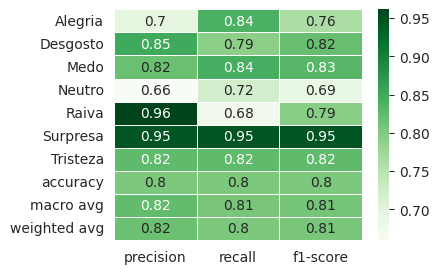

In [ ]:
# Definindo variável y_pred
y_pred = grid_search.predict(x_test)

# Criando relatório de classificação
report_df = pd.DataFrame(classification_report(y_test,y_pred, output_dict=True)). T
report_df = report_df.drop(columns=['support'])

# Plotagem do relatório de classificação
plt.subplots(figsize=(4,3))
sns.heatmap(report_df, cmap='Greens', linewidths=0.5, annot=True);

#### **Matriz de confusão**
---

In [ ]:
# Criando a matriz de confusão
cnf_report_df = report_df.index[:-3]
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix = pd.DataFrame(cnf_matrix, index = cnf_report_df.values, columns = cnf_report_df.values)
cnf_matrix = cnf_matrix/cnf_matrix.sum(axis=1)[:, np.newaxis] # Normalização em linha (recall)

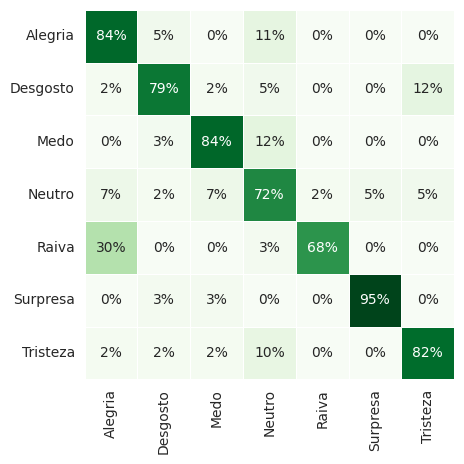

In [ ]:
# Plotagem da matriz de confusão
sns.heatmap(cnf_matrix, cmap='Greens', linecolor='white', linewidths=0.5,
            annot=True, fmt='.0%', cbar=False, square=True);

#### **Teste validação - Cenário real**
---

Durante a preparação dos dados separamos alguns pare frase-sentimento que não foram usados para o treinamento do modelo mas serão usados para testar nosso modelo em um cenário com dados nunca vistos por ele - vale destacar aqui que esses dados foram tirados apenas dos diálogos originais do Simplício, nessa etapa não usamos dados gerados artificialmente


In [ ]:
# Verificando informações
df_validacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Texto   37 non-null     object
 1   Emocao  37 non-null     object
dtypes: object(2)
memory usage: 720.0+ bytes


In [ ]:
# Distribuição de sentimentos dataset de validação
df_validacao.Emocao.value_counts()

Neutro      7
Alegria     6
Medo        6
Surpresa    6
Tristeza    6
Desgosto    4
Raiva       2
Name: Emocao, dtype: int64

In [ ]:
# Criando coluna de 'Previsao' no dataset de validação
df_validacao['Previsao'] = grid_search.predict(df_validacao['Texto'])

In [ ]:
# Acurácia
acuracia = accuracy_score(df_validacao['Emocao'], df_validacao['Previsao'])
print("Acurácia do modelo nos dados de validação: %.2f%%" % (acuracia * 100))

Acurácia do modelo nos dados de validação: 75.68%


In [ ]:
# Visualização do dataset de validação com as previsões
df_validacao

,Texto,Emocao,Previsao
0,eu amo voce simplicio,Alegria,Neutro
1,que bom ter voce aqui de volta me conta o que ...,Alegria,Alegria
2,a cancao que eu mais gosto e a asa branca,Alegria,Alegria
3,a felicidade e estar com a saude boa estar com...,Alegria,Alegria
4,eu torco para o santos,Alegria,Alegria
5,eu torco para o santos sou santista,Alegria,Alegria
6,mas eu não gosto de tomar um metformina,Desgosto,Desgosto
7,dores nas pernas nas costas nas maos nos braco...,Desgosto,Desgosto
8,e sabe eu nao gosto muito de medico nao sabe m...,Desgosto,Desgosto
9,e uma dor forte uma dor que eu nao consigo nem...,Desgosto,Desgosto


In [ ]:
# Testes aleatórios

#frase = 'Eu adoro futebol'
#grid_search.predict([frase])

Aqui conseguimos manter nossa acurácia em um patamar elevado, 75.68%, porém com uma análise visual das predições do modelo observamos que ele ainda têm problemas como no sentimento "Raiva" o qual ele não foi capaz de acertar nenhum dos casos apresentados

#### **Overfitting**
---

A princípio acreditamos que nosso modelo apresentou bons resultados nos dados de teste e de fato apresentou! De qualquer forma, vamos verificar se não houve um overfitting:

In [ ]:
# Avaliar o desempenho do modelo nos dados de treinamento
train_accuracy = grid_search.score(x_train, y_train)
print("Acurácia do modelo nos dados de treinamento: %.2f%%" % (train_accuracy * 100))

# Avaliar o desempenho do modelo nos dados de teste
test_accuracy = grid_search.score(x_test, y_test)
print("Acurácia do modelo nos dados de teste: %.2f%%" % (test_accuracy * 100))

Acurácia do modelo nos dados de treinamento: 97.04%
Acurácia do modelo nos dados de teste: 80.43%


In [ ]:
# Obter as previsões do modelo nos dados de treinamento e teste
y_train_pred = grid_search.predict(x_train)
y_test_pred = grid_search.predict(x_test)

# Calcular as métricas para os dados de treinamento
train_report = classification_report(y_train, y_train_pred)
print("Relatório de Classificação - Dados de Treinamento:")
print(train_report)

# Calcular as métricas para os dados de teste
test_report = classification_report(y_test, y_test_pred)
print("Relatório de Classificação - Dados de Teste:")
print(test_report)

Relatório de Classificação - Dados de Treinamento:
              precision    recall  f1-score   support

     Alegria       0.98      0.98      0.98       102
    Desgosto       0.95      0.95      0.95        99
        Medo       0.96      0.97      0.97        76
      Neutro       0.93      0.96      0.95        99
       Raiva       1.00      1.00      1.00        87
    Surpresa       1.00      0.95      0.98        86
    Tristeza       0.98      0.98      0.98        92

    accuracy                           0.97       641
   macro avg       0.97      0.97      0.97       641
weighted avg       0.97      0.97      0.97       641

Relatório de Classificação - Dados de Teste:
              precision    recall  f1-score   support

     Alegria       0.70      0.84      0.76        44
    Desgosto       0.85      0.79      0.82        43
        Medo       0.82      0.84      0.83        32
      Neutro       0.66      0.72      0.69        43
       Raiva       0.96      0.68   

Com base nos relatórios de classificação fornecidos, há uma indicação de que o modelo pode estar sofrendo de overfitting. Isso ocorre porque o desempenho nos dados de treinamento é geralmente mais alto do que nos dados de teste. Algumas métricas, como precisão, recall e F1-score, apresentam valores mais altos nos dados de treinamento em comparação com os dados de teste.

A diferença de acurácia entre os dados de treinamento (97.04%) e teste (80.43%) é de cerca de 16 pontos percentuais, o que indica uma diferença considerável e levanta preocupações sobre a capacidade de generalização do modelo, principalmente no sentimento de 'Raiva'.

#### **Considerações**
---

Com base nos testes realizados vemos que o modelo v1.3 apresentou uma acurácia de 80% e melhorou em relação aos anteriores (acurácia de 60%, 61% e 58%, respectivamente), também tivemos melhoras visiveis no mapa de calor (exemplo: 95% de recall no sentimento 'Surpresa'), no entanto, ao comparar os resultados de treino, teste e validação observamos que o modelo apresenta indícios de overfitting, ele não está conseguindo extrapolar/generalizar os resultados positivos para novos dados, vimos essa grande diferença no desempenho entre treinamento e teste e o fato de ele ainda não conseguir lidar com o sentimento "Raiva"

## **Conclusão**
---

Através deste estudo, quis trazer a criação de um modelo de machine learning, passando por processos de tratamentos de dados, modelagem, otimização, avaliação e por fim a submissão do nosso modelo em dados de teste, a fim de deixar o entendimento mais transparente e direto.

Obviamente, como todos os estudos, este não é uma exceção e poderá ser sempre refinado e sempre estará aberto para novas ideias, feedbacks e ferramentas a serem implementadas.

Nessa etapa testamos nosso primeiro modelo de análise de sentimentos com as interações das pessoas reais com o nosso paciente virtual Simplício.
Fizemos 4 versões com o algoritmo Naive Bayes (v1.0; v1.1; v1.2; v1.3), assim testamos diversas configurações e modificações possíveis no modelo e nos dados.

De maneira geral nossos maiores problemas foram:
-  **A qualidade dos dados originais:** Principalmente para os sentimentos de 'Raiva' e de 'Surpresa'
- **O desbalanceamento das classes**: Tivemos que criar dados virtuais no gpt
- **A qualidade dos dados virtuais:** Nossos modelos apresentaram dificuldades para conseguir classificar o sentimento de 'Raiva'. Isso porque plataformas como o gpt não geram texto com xingamentos por exemplo.

Apesar dos problemas conseguimos criar um prototipo inicial promissor pensando em um v1. Outras técnicas e manipulações podem ser feitas no futuro visando melhorar seu desempenho, por exemplo partindo de v1.3 poderia-se aplicar técnicas para impedir o overfitting.

Resumindo cada versão e resultados em tópicos temos o seguinte:
- **v1.0**
	- Utilização do método Undersampling
	- acurácia = 60%
	- f1-score = 69%
- **v1.1**
	- Utilização do método Undersampling + Hiperparâmetros
	- acurácia = 61%
	- f1-score = 69%
- **v1.2**
	- Undersampling + Hiperparâmetros + Oversampling
	- acurácia = 58%
	- f1-score = 67%
- **v1.3**
	- Dados balanceados (gpt) + Hiperparâmetros
	- acurácia = 80%
	- f1-score = 81%